In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def populacao(r, y0, n):
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = r*y[i-1]*(1-y[i-1])
    return y
    

def plot_pop(valores_r, valores_y0, n, titulo, xlabel = "n", ylabel = "y"):
    for r in valores_r:
        for y0 in valores_y0:
            valores_y = populacao(r, y0, n)
            plt.plot(range(n), valores_y, label=f'r = {r}, y0 = {y0}')

    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


def diagrama_bifurcacao(r_min, r_max, nmax=1000, ultimos_pontos=100, y_inicial=0.5, restricao_y=None):
    valores_r = np.linspace(r_min, r_max, 10000)
    valores_y = np.zeros((len(valores_r), ultimos_pontos))
    for i, r in enumerate(valores_r):
        y = 0.5
        for n in range(nmax):
            y = r * y * (1 - y)  # Atualiza y com a equação logística
            if n >= nmax - ultimos_pontos:  # Armazena os últimos 100 pontos
                valores_y[i, n - (nmax - ultimos_pontos)] = y

    plt.figure(figsize=(12, 8))
    plt.plot(valores_r, valores_y, ',k', alpha=0.25)  # Pontos pequenos para cada valor
    plt.title("Diagrama de Bifurcação")
    plt.xlabel("r")
    plt.ylabel("y")
    plt.xlim(r_min, r_max) #Os limites do eixo x ficarão entre o mínimo e o máximo valor de r
    plt.ylim(-0.1, 1.1)
    if restricao_y:
        plt.ylim(restricao_y)
    else:
        plt.ylim(-0.1, 1.1)
    plt.grid()
    plt.show()
    return   
    

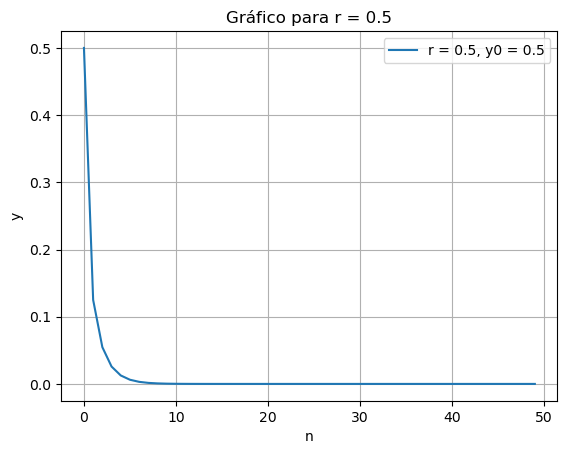

In [5]:
#1. Para o caso de r = 0.5 

valores_r = [0.5]
valores_y = [.5]
n = 50

plot_pop(valores_r, valores_y, n, titulo = "Gráfico para r = 0.5")


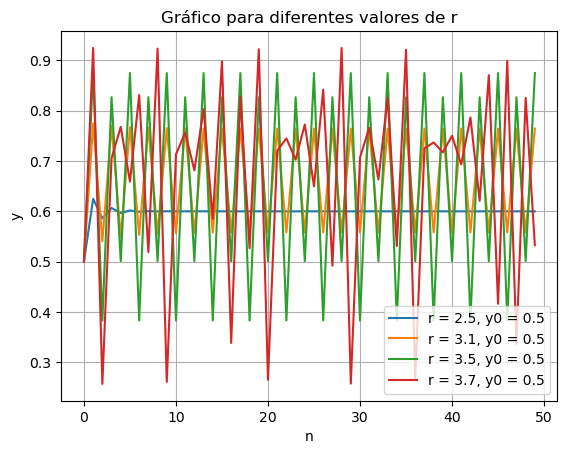

In [41]:
#2. Repetiremos o procedimento para os seguintes valores de r

valores_r = [2.5, 3.1, 3.5, 3.7]
valores_y = [0.5]
n = 50
plot_pop(valores_r, valores_y, n, titulo = "Gráfico para diferentes valores de r")


In [7]:
#Podemos observar aqui que, mesmo que as curvas sejam diferentes para cada valor de r, elas seguem um padrão de crescimento e decrescimento
#cuja regularidade é perceptível, principalmente para r > 3. 

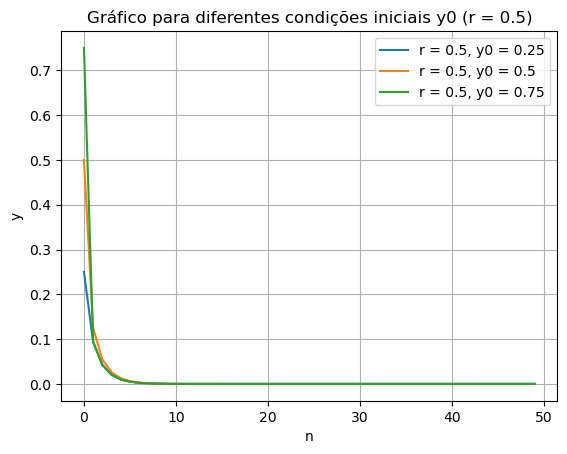

In [8]:
#3. Agora, faremos o mesmo procedimento para diferentes valores de y

valores_r = [0.5]
valores_y = [0.25, 0.5, 0.75]
n = 50
plot_pop(valores_r, valores_y, n, titulo = "Gráfico para diferentes condições iniciais y0 (r = 0.5)")

In [9]:
#Neste caso,podemos observar que as linhas seguem o mesmo padrão de decrescimento, sendo a única diferença as condições iniciais.

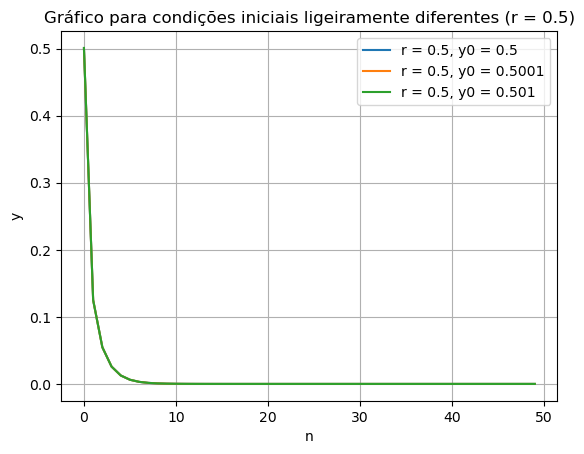

In [6]:
#4. Agora, com as três condições iniciais ligeiramente diferentes

valores_r = [0.5]
valores_y = [0.5, 0.5001, 0.501]
n = 50
plot_pop(valores_r, valores_y, n, titulo = "Gráfico para condições iniciais ligeiramente diferentes (r = 0.5)")

In [11]:
#Aqui, podemos ver que uma variação mínima não muda em praticamente nada o resultado, ao ponto de que as curvas se sobrepõem perfeitamente

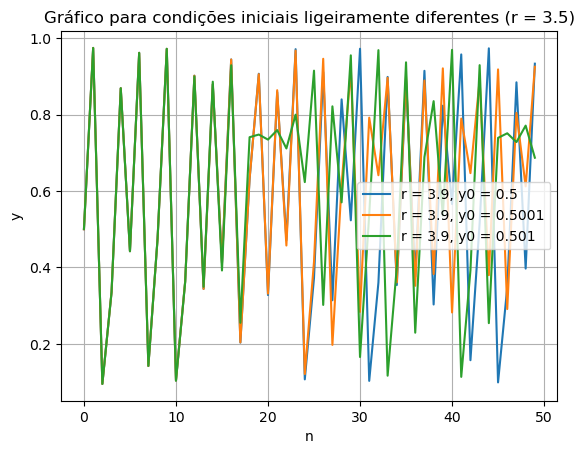

In [10]:
#Agora, vejamos para r = 3.5

valores_r = [3.9]
valores_y = [0.5, 0.5001, 0.501]
n = 50
plot_pop(valores_r, valores_y, n, titulo = "Gráfico para condições iniciais ligeiramente diferentes (r = 3.5)")

In [16]:
#Observa-se que as curvas se sobrepõem novamente

In [17]:
#5. Agora, iteraremos a equação 1000 vezes para 10000 valores de r. Vejamos os resultados:

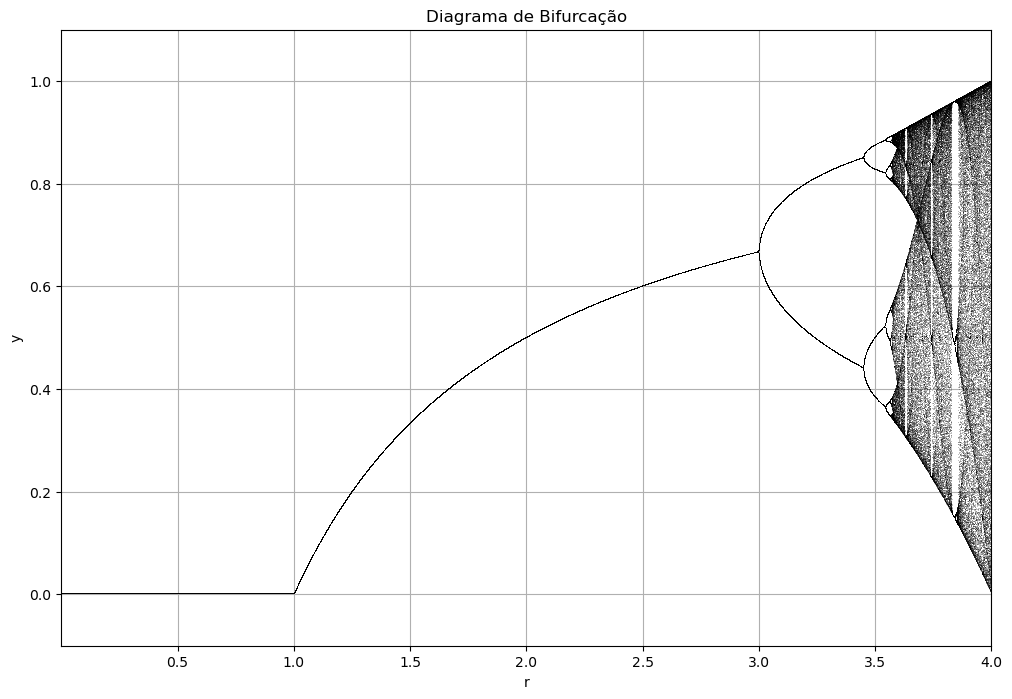

In [18]:
diagrama_bifurcacao(1e-05, 4.0)

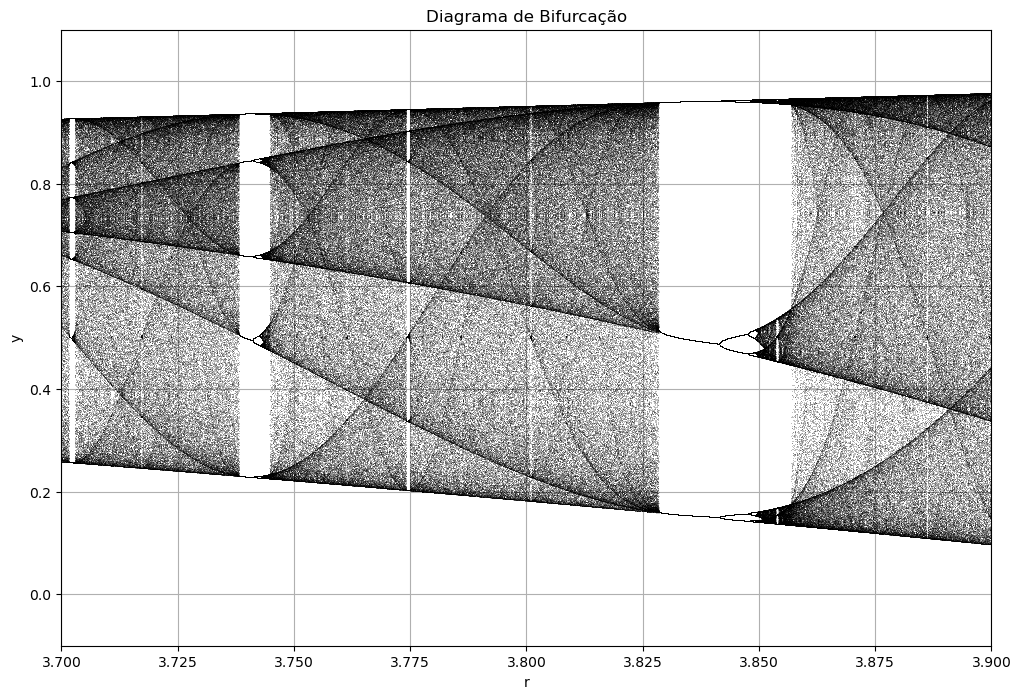

In [19]:
diagrama_bifurcacao(3.7, 3.9)

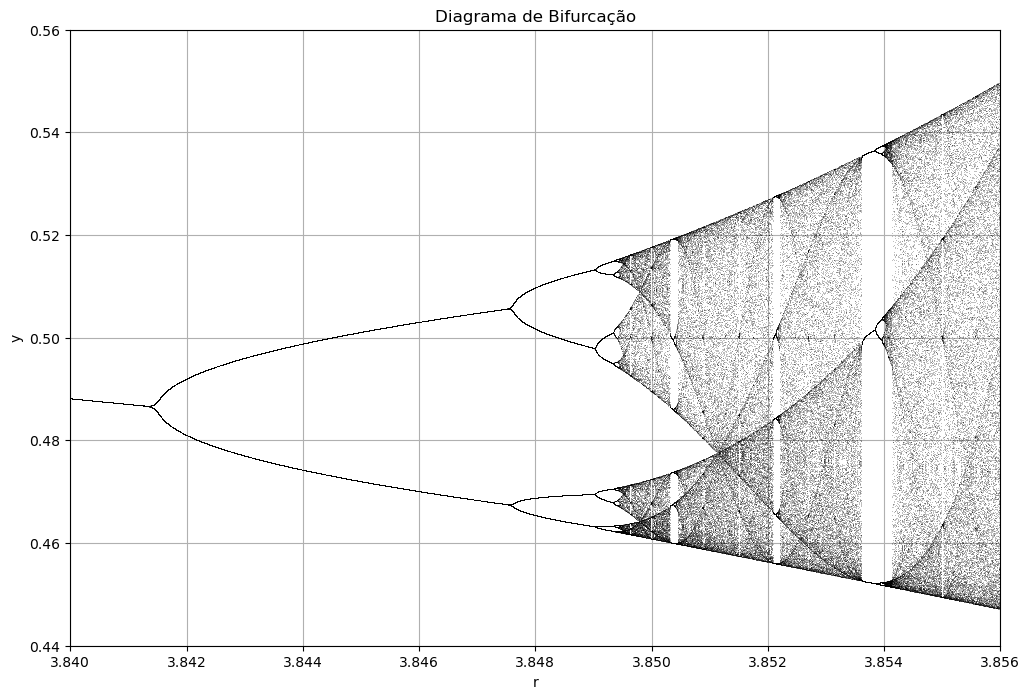

In [20]:
diagrama_bifurcacao(3.840, 3.856, restricao_y = (0.44, 0.56))